In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Plotting 


df = pd.read_csv('DataFrame.csv',encoding='latin-1')  #importing our dataset 

df = df.fillna(df.mean()) #filling nan values with means because without this, there occurred some problems about pca fitting


n = df.drop(df.columns[0], axis=1)     #Getting rid of the unnecessary columns (Row id, company_size , company_type ,major_discipline)
del n['Unnamed: 0.1']                  #Deleting an unnecessary column named "Unnamed: 0.1"

n1 = n.drop(n.columns[7], axis=1)      #We dropped these columns not because of their content, all of the columns were disorganized and extra
n2 = n1.drop(n1.columns[8], axis=1)
n3 = n2.drop(n2.columns[8], axis=1)

#.csv contains personal info of 2128 person who submitted to our company. The file contains info about them. To be 
#more spesific, it contains their id, city, insurance note, gender, relevant experience, education level and type, experience years, 
#variety of work environments, training hours and additional info and their result of approval
n3.head()


,enrollee_id,city,city_index,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,Additional Info,Approval
0,32403,41,0.827,Male,Has relevent experience,Full time course,Graduate,9.0,1.0,21,"To prove myself dedicated, worthy and energeti...",2
1,9858,103,0.920,Female,Has relevent experience,no_enrollment,Graduate,5.0,1.0,98,Working as Software Developer at IngroInfo Sof...,2
2,31806,21,0.624,Male,No relevent experience,no_enrollment,High School,1.0,0.0,15,Looking for a challenging career which demands...,2
3,27385,13,0.827,Male,Has relevent experience,no_enrollment,Masters,11.0,1.0,39,NONE,2
4,27724,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,20.0,4.0,72,NONE,1


# Outlier Removal Using Tukey Method

In [2]:
#Outlier removal using Tukey m.



# We are gonna use only the numerical columns tukey method
# Those are 'enrollee_id' , 'city' , 'city_index' , 'experience' ,'last_new_job', 'training_hours'



pd.options.display.float_format = '{:.1f}'.format # getting only the first float point to display

n3.describe() #With this, we can see the Q1 and Q3 of the Distance values and interpret them to obtain IQR

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['enrollee_id']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['enrollee_id']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['enrollee_id'] <=Upper ]
n3 = n3[n3['enrollee_id'] >=Lower ]

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['city']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['city']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['city'] <=Upper ]
n3 = n3[n3['city'] >=Lower ]

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['city_index']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['city_index']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['city_index'] <=Upper ]
n3 = n3[n3['city_index'] >=Lower ]

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['experience']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['experience']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['experience'] <=Upper ]
n3 = n3[n3['experience'] >=Lower ]

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['last_new_job']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['last_new_job']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['last_new_job'] <=Upper ]
n3 = n3[n3['last_new_job'] >=Lower ]

#-----------------------------------------------------------------------#

Q1 = np.percentile(n3[['training_hours']], 25, interpolation = 'midpoint') 
Q3 = np.percentile(n3[['training_hours']], 75, interpolation = 'midpoint') 

IQR = Q3 - Q1      

Lower = Q1-1.5*IQR
Upper = Q1+1.5*IQR

n3 = n3[n3['training_hours'] <=Upper ]
n3 = n3[n3['training_hours'] >=Lower ]

#-----------------------------------------------------------------------#
#All outliers removed from the numerical data
n3.describe()

,enrollee_id,city,city_index,experience,last_new_job,training_hours,Approval
count,1790.0,1790.0,1790.0,1790.0,1790.0,1790.0,1790.0
mean,16861.3,78.8,0.8,10.0,1.8,45.3,1.9
std,9564.1,46.3,0.1,6.6,1.3,30.2,0.3
min,3.0,1.0,0.4,1.0,0.0,1.0,1.0
25%,8580.2,21.0,0.7,4.0,1.0,20.0,2.0
50%,16720.5,102.0,0.9,9.0,1.0,40.0,2.0
75%,25139.0,104.0,0.9,16.0,3.0,66.0,2.0
max,33353.0,160.0,0.9,20.0,4.0,117.0,2.0


# Data Preprocessing 

In [3]:

# We will first transform the columns gender,relevent_experience,enrolled_university and education_level to predetermined
#integer values( For example for the gender column Male will be 2 and Female will be 1), using this way, we can use PCA
#easier. We will be just seperating the column 'Additional info' for future usage(Text Mining), then the rest is running Pca, 
#K means Naive Bayes


#numericalizing the gender column
n3['gender'] = [1 if element == 'Male' else element for element in n3['gender']]    
n3['gender'] = [2 if element == 'Female' else element for element in n3['gender']]
n3['gender'] = [3 if element == 'Other' else element for element in n3['gender']]

n3['gender'] = n3['gender'].fillna(n3['gender'].mean()) #Removing NaN inputs from each numerical column that we converted

#numericalizing the relevent_experience column
n3['relevent_experience'] = [1 if element == 'Has relevent experience' else element for element in n3['relevent_experience']]
n3['relevent_experience'] = [2 if element == 'No relevent experience' else element for element in n3['relevent_experience']]

n3['relevent_experience'] = n3['relevent_experience'].fillna(n3['relevent_experience'].mean()) #Removing NaN inputs from each numerical column that we converted

#numericalizing the enrolled_university column
n3['enrolled_university'] = [3 if element == 'Part time course' else element for element in n3['enrolled_university']]
n3['enrolled_university'] = [2 if element == 'Full time course' else element for element in n3['enrolled_university']]
n3['enrolled_university'] = [1 if element == 'no_enrollment' else element for element in n3['enrolled_university']]

n3['enrolled_university'] = n3['enrolled_university'].fillna(n3['enrolled_university'].mean()) #Removing NaN inputs from each numerical column that we converted

#numericalizing the education_level column
n3['education_level'] = [1 if element == 'Primary School' else element for element in n3['education_level']]
n3['education_level'] = [2 if element == 'High School' else element for element in n3['education_level']]
n3['education_level'] = [3 if element == 'Graduate' else element for element in n3['education_level']]
n3['education_level'] = [4 if element == 'Masters' else element for element in n3['education_level']]
n3['education_level'] = [5 if element == 'Phd' else element for element in n3['education_level']]

n3['education_level'] = n3['education_level'].fillna(n3['education_level'].mean()) #Removing NaN inputs from each numerical column that we converted

#Separating our dataframe to two parts as one for the numerical entries, one for the text entry (Additional info)

n3Numerical = n3[['enrollee_id' ,'city' , 'city_index' , 'gender' , 'relevent_experience' , 'enrolled_university' ,'education_level' , 'experience' , 'last_new_job' , 'training_hours' , 'Approval']]
n3Text = n3[['Additional Info']]  #Text part, later we are going to parse it and use it for visualization

n3Numerical.head()

,enrollee_id,city,city_index,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,Approval
0,32403,41,0.8,1.0,1,2.0,3.0,9.0,1.0,21,2
1,9858,103,0.9,2.0,1,1.0,3.0,5.0,1.0,98,2
2,31806,21,0.6,1.0,2,1.0,2.0,1.0,0.0,15,2
3,27385,13,0.8,1.0,1,1.0,4.0,11.0,1.0,39,2
4,27724,103,0.9,1.0,1,1.0,3.0,20.0,4.0,72,1


# Supervised Learning Using Gaussian Naive Bayes

In [4]:
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB  

#Making a copy of the numerical part 
n4=n3Numerical[['enrollee_id','city','city_index','gender','relevent_experience','enrolled_university','education_level','experience','last_new_job','training_hours']]

#Assigning X and Ys for the Naive Bayes Classification
X=n3Numerical[['enrollee_id','city','city_index','gender','relevent_experience','enrolled_university','education_level','experience','last_new_job','training_hours']]
y=n3Numerical[['Approval']]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

classifier = GaussianNB()  
classifier.fit(x_train, y_train)   

D:\Programlar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [5]:
#Calculating the Accuracy score

from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)  

accuracy_score(y_test, y_pred) 


0.9497206703910615

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print()

conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred))

#0 means not approved
#1 means approved

Accuracy:  0.9497206703910615

Confusion Matrix
[[ 52   8]
 [ 19 458]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.87      0.79        60
           2       0.98      0.96      0.97       477

    accuracy                           0.95       537
   macro avg       0.86      0.91      0.88       537
weighted avg       0.95      0.95      0.95       537



# Principal Component Analysis

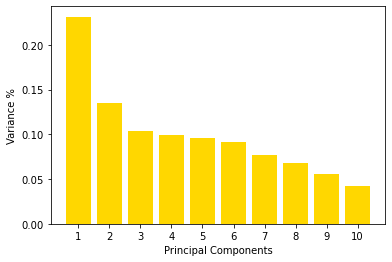

In [7]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA # Needed for dimension reduction


n4= StandardScaler().fit_transform(n4) # normalizing the data 

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(n4)


# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

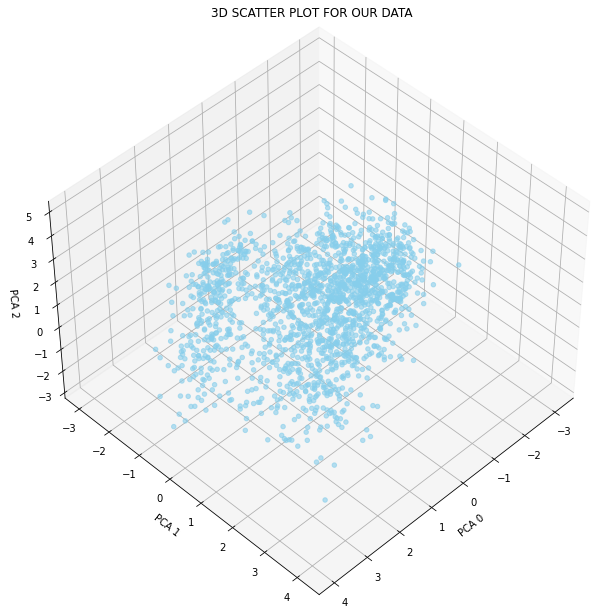

In [8]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))


ax = Axes3D(fig)
ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2] , c='skyblue',  alpha=0.6, marker='o' )

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')

ax.view_init(45,45)
ax.set_title('3D SCATTER PLOT FOR OUR DATA')

plt.show()



# Unsupervised Learning by K Means Clustering

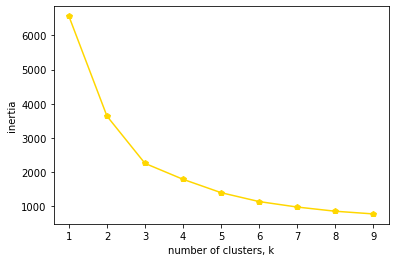

In [9]:
##K MEANS
from sklearn.cluster import KMeans # Our clustering algorithm


inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()


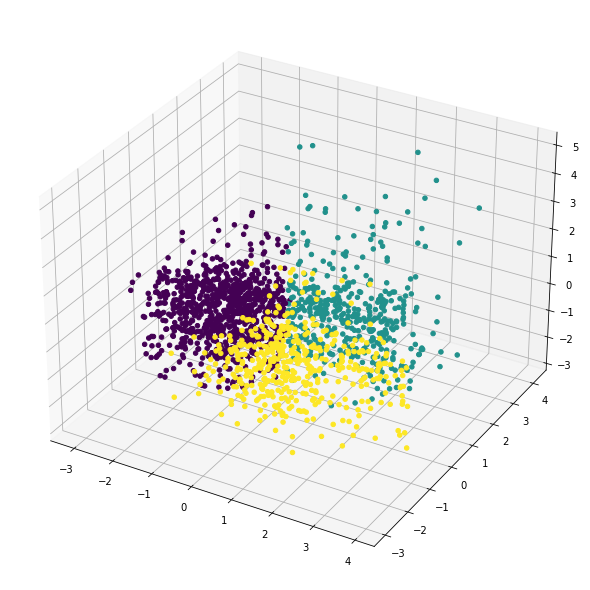

In [10]:
 # %matplotlib notebook

model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])

fig = plt.figure(figsize=(8,8))


ax = Axes3D(fig)
ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2] , c=labels,  alpha=1, marker='o' )


plt.show()

# Visualisation using Text Mining 

In [11]:
##Doing Text Mining on our String Column named 'Additional Info'

#!pip install nltk              #already downloaded the necessary package Natural Language toolkit

#n3Text = n3[['Additional Info']]  #Text part, later we are going to parse it and use it for visualization


import re        #regular expressions
import codecs    #for to get our txt file
import collections 

from wordcloud import WordCloud   #importing wordcloud 
from wordcloud import ImageColorGenerator #for to color our wordcloud according to our image
from PIL import Image     #importing Image for getting our mask(as jpg file)

import nltk    #importing natural language toolkit for dealing with unstructured texts
              #I am using nltk apart from the video on the aybuzem because it is compatible with the flow of my code
              # and I want to have a more specialized WordCloud in the end
from nltk.stem import PorterStemmer # This package is for to find thr root of the words(for example: likes, likely, likeable will be count as like)
from nltk.tokenize import WordPunctTokenizer #This package is for to extract the tokens from string of words 
from nltk.corpus import stopwords #importing stopwords for to detect them(and, the, so etc.)


nltk.download('stopwords')  #downloading the stopwords, stopwords are basically the words that are used often in our language but
#they do not have a spesific content/meaning. the words like because , and, there etc. If we run our wordcloud without
#removing them, the visualization would be full of stopwords and thus interrupting us from understanding the text more


AdditionalInfo = ' '

n3Text.rename(columns = {'Additional Info':'Additional_Info'}, inplace = True) 
#n3Text['Additional_Info'] = n3Text['Additional_Info'].astype(str)

for val in n3Text.Additional_Info: 

   # typecaste each val to string 
   val = str(val) 
   AdditionalInfo = AdditionalInfo + val + ' '
  
print(AdditionalInfo)

 To prove myself dedicated, worthy and energetic in a progressive organization that gives me chance to apply my knowledge and skills, and be a member of a team that dynamically work towards the growth of the organization. Working as Software Developer at IngroInfo Software Solutions Pvt. Ltd. Looking for a challenging career which demands the best of my professional 
ability in terms of technical and analytical skills, and helps me in broadening 
and enhancing my current skill and knowledge. 
 
Programming language: Java NONE NONE NONE To secure a challenging position where I can effectively contribute my skills as Software Professional, possessing competent 
Technical Skills. NONE Attain the position of 'Java Developer' in fast growing organization, that offering technical 
expertise to utilize in software development, which helps me to succeed in an environment 
of excellence.  The ability to Work in a team. 
 Leadership Qualities. 
 Hardworking with lots of patience. 
 Organizing Ca

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
D:\Programlar\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
EnglishStopWords = stopwords.words('english')  
# we can add any word to this EnglishStopWords.append('') to remove any word
EnglishStopWords.append('could') #I realised that these two are nonexist in the default stopwords
EnglishStopWords.append('would')



word_pattern = re.compile("^\w+$")    #We can remove any of the pattern that we want not to include in the output


In [13]:
def text_counter(text): 
    tokens= WordPunctTokenizer().tokenize(PorterStemmer().stem(text))  #stemming
    tokens= list(map(lambda x: x.lower(), tokens))     #lowercasing all
    tokens= [token for token in tokens if re.match(word_pattern, token) and token not in EnglishStopWords] #removing stopwords
    return collections.Counter(tokens)

In [14]:
mycounter = text_counter(AdditionalInfo)  #using the counter with my data
mycounter


Counter({'prove': 25,
         'dedicated': 35,
         'worthy': 1,
         'energetic': 9,
         'progressive': 54,
         'organization': 627,
         'gives': 45,
         'chance': 16,
         'apply': 47,
         'knowledge': 637,
         'skills': 773,
         'member': 24,
         'team': 284,
         'dynamically': 8,
         'work': 533,
         'towards': 84,
         'growth': 331,
         'working': 264,
         'software': 359,
         'developer': 271,
         'ingroinfo': 1,
         'solutions': 114,
         'pvt': 47,
         'ltd': 55,
         'looking': 84,
         'challenging': 304,
         'career': 225,
         'demands': 6,
         'best': 144,
         'professional': 304,
         'ability': 158,
         'terms': 8,
         'technical': 240,
         'analytical': 114,
         'helps': 16,
         'broadening': 4,
         'enhancing': 26,
         'current': 20,
         'skill': 63,
         'programming': 143,
         'langu

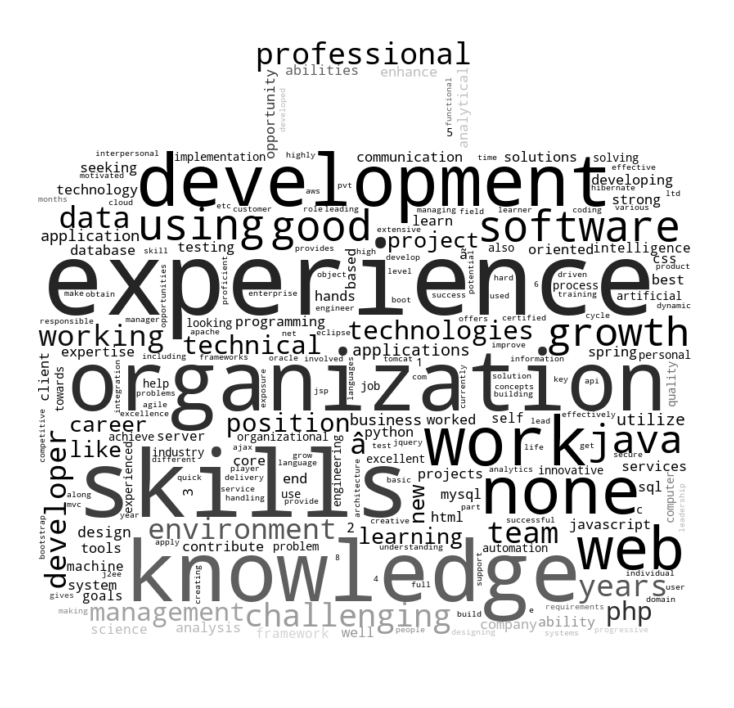

In [15]:
 myMask = np.array(Image.open('MyMask.jpg')) 


wordcloud = WordCloud(width = 1000, height = 1000,  max_words=100000,#we can give input of max words If we want an upper limit, default is 200 I checked it
                background_color ='white',  mask= myMask,
                
                min_font_size = 10).generate_from_frequencies(mycounter) #sending my counter containing my words and repetitions
  
    #I can use generate(String) with the wordcloud but with generate_from_frequencies(Counter_obj) I am able to
    #visualize a more important thing, repetititons. Now, the size of the each word will be depending on its repetition count
    #more repetitions means bigger word in the output. This creates a better visual understanding 
    
 
image_colors = ImageColorGenerator(myMask)
wordcloud.recolor(color_func=image_colors)  # To add the original color of the image to our wordcloud


 # plot the WordCloud image  
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud ,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()   